In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import jax.random as random
import pandas as pd
import seaborn as sns

import particle_filter as pf
from proj_data import proj_data
from lotvol_model import LotVolModel

key = random.PRNGKey(0)

# parameter values

alpha = 1.0
beta = 1.0
gamma = 4.0
delta = 1.0
sigma_h = 0.01
sigma_l = 0.01
tau_h = 0.25
tau_l = 0.25

theta = np.array([alpha, beta, gamma, delta, sigma_h, sigma_l, tau_h, tau_l])

dt = 0.1
n_res = 2
n_obs = 100
lotvol_model = LotVolModel(dt, n_res) 
key, subkey = random.split(key)


In [2]:
x_init = lotvol_model.init_sample(y_init=jnp.log(jnp.array([5., 3.])),
                     theta=jnp.append(theta[0:6], jnp.array([0., 0.])),
                     key=subkey)

In [3]:
y_meas, x_state = pf.meas_sim(lotvol_model, n_obs, x_init, theta, subkey)


Plotting the observations of the state (latent variables) as well as the observations. The latent observations are the smooth lines given below and the observations are the slightly more jagged lines.

Text(0.5, 1.0, 'Observations and Latent')

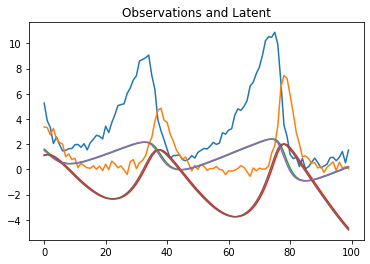

In [4]:
import matplotlib.pyplot as plt
plt.plot(y_meas[:, 0])
plt.plot(y_meas[:, 1])
plt.plot(x_state[:,0])
plt.plot(x_state[:, 1])
plt.title("Observations and Latent")

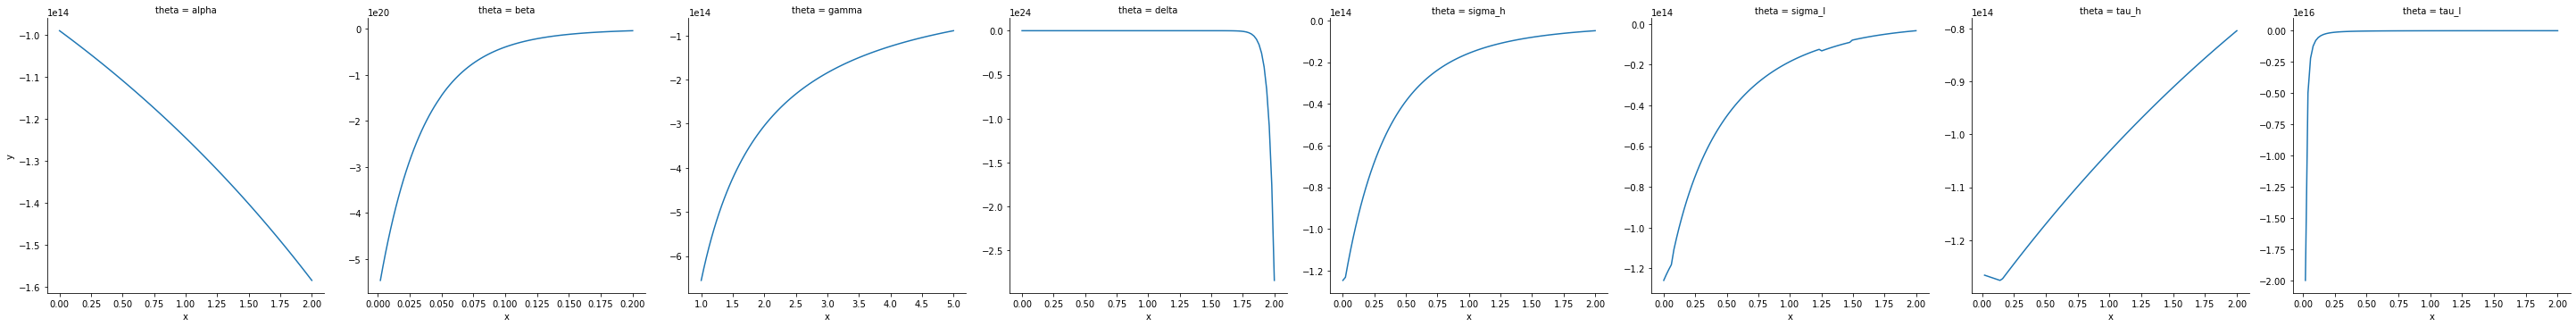

In [5]:
theta_lims = np.array([[0., 2.], [0., .2], [1.0, 5.0], [0., 2.], [0., 2.], [0., 2.], [0., 2.], [0., 2.]])
theta_names = ["alpha", "beta", "gamma", "delta", "sigma_h", "sigma_l", "tau_h", "tau_l"]
n_pts = 100

# calculate projection plot

def custom_fn(th):
    temp = pf.particle_filter(lotvol_model, y_meas, th, 100, key)
    return pf.particle_loglik(temp['logw_particles'])

plot_df = proj_data(lambda th: custom_fn(th),
                    theta, theta_lims, theta_names)

sns.relplot(
    data=plot_df, kind="line",
    x="x", y="y", col="theta",
    facet_kws=dict(sharex=False, sharey=False)
)

Stochastic Optimization given below -- For now, we initialize it to be the starting values that were chosen. In addition to this, we also initialize the mask array to be this so that we can verify the results on a one dimensional optimization problem.

In [6]:
from particle_filter import stoch_opt, get_sum_lweights

In [7]:
stoch_opt(lotvol_model, jnp.array([1.,1.,4., 1., 0.01, 0.01, 0.25, 0.25]), get_sum_lweights, y_meas, key=key, learning_rate=0.0000000001, iterations=2000, n_particles=1000,
         mask=np.array([0,1,0,0,0,0,0,0]))

/home/pranavsubramani/.local/lib/python3.8/site-packages/jax/interpreters/xla.py:841: UserWarning: Some donated buffers were not usable: f32[8]{0}
  warn("Some donated buffers were not usable: {}".format(


[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+00 1.000000e+00 1.000000e-02
 1.000000e-02 2.500000e-01 2.500000e-01]
[1.000000e+00 8.066318e+04 4.000000e+

DeviceArray([1.000000e+00, 8.066318e+04, 4.000000e+00, 1.000000e+00,
             1.000000e-02, 1.000000e-02, 2.500000e-01, 2.500000e-01],            dtype=float32)